#Introduction

Now I have just learnt something new, Random Forest. Random Forest can do regression as well which I'm going to compare Linear Regression and Random Forest Regression to see which one preforms better. We're going to use 

I'm inspired by the blog post from Yhat and I'm going to get the data from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Now let's look at our data. 

In [70]:
%matplotlib inline 
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [33]:
wine = pd.read_csv('winequality-red.csv', sep=';')

In [24]:
wine.shape

(1599, 12)

In [25]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


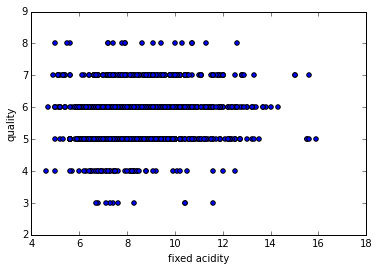

In [26]:
wine.plot(kind='scatter', x='fixed acidity', y='quality');

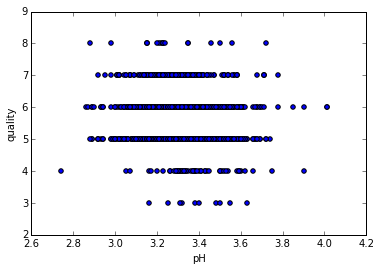

In [28]:
wine.plot(kind='scatter', x='pH', y='quality');

It looks like Linear Regression wouldn't work at this point. I don't see any correlation in the data.

In [44]:
train, test = train_test_split(wine, test_size = 0.2)

In [45]:
train.shape

(1279, 12)

In [46]:
test.shape

(320, 12)

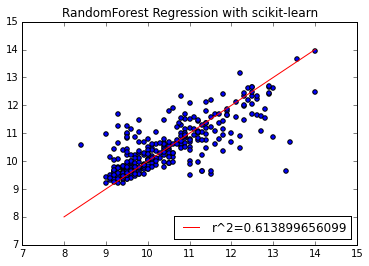

In [64]:
cols = ['fixed acidity', 'density', 'pH']
rf = RandomForestRegressor(n_estimators=20)
rf.fit(train[cols], train.alcohol)

# Predict the algohol content
predicted_alcohol = rf.predict(test[cols])

r2 = r2_score(test.alcohol, predicted_alcohol)
mse = np.mean((test.alcohol - predicted_alcohol)**2)
 
pl.scatter(test.alcohol, predicted_alcohol)
pl.plot(np.arange(8, 15), np.arange(8, 15), label="r^2=" + str(r2), c="r")
pl.legend(loc="lower right")
pl.title("RandomForest Regression with scikit-learn")
pl.show()

In [79]:
cols = train.columns[:11]
clf = RandomForestClassifier(n_estimators=20, max_features=10, min_samples_split=5)
clf.fit(train[cols], train.quality)
pd.crosstab(test.quality, clf.predict(test[cols]), rownames=["Actual"], colnames=["Pred"])

Pred,4,5,6,7
Actual,,,,
3,1,2,0,0
4,0,6,3,1
5,0,114,19,0
6,0,32,97,6
7,0,0,11,24
8,0,1,2,1


In [80]:
np.sum(test.quality==clf.predict(test[cols])) / float(len(test))

0.734375